# Model Analysis
In this notebook, we load the previously trained machine learning models and perform a detailed analysis of their performance, examining various metrics and discussing potential improvements.


In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from model import load_model, evaluate_model
import preprocessing

In [2]:
model = load_model('./models/LR_roc_auc.pkl') # simply change the model path here, we can do anaylysis on different model

2024-04-19 00:32:18,478:INFO:Model loaded from ./models/LR_roc_auc.pkl.


In [3]:
events_file_path = './data/events.csv'
ginf_file_path = './data/ginf.csv'

df = preprocessing.load_and_merge_data(events_file_path, ginf_file_path)
X_train, X_test, y_train, y_test = preprocessing.preprocess_data(df, scale=False)

2024-04-19 00:32:18,489:INFO:Starting to load datasets.
2024-04-19 00:32:29,160:INFO:Loaded events data from ./data/events.csv.
2024-04-19 00:32:29,255:INFO:Loaded game information data from ./data/ginf.csv.
2024-04-19 00:32:30,288:INFO:Merged events and game information datasets.
2024-04-19 00:32:30,377:INFO:Starting preprocessing of data.
2024-04-19 00:32:37,250:INFO:Removed duplicate records.
2024-04-19 00:32:37,423:INFO:Filled missing values for categorical data.
2024-04-19 00:32:40,169:INFO:Selected features and target. Applied meaningful one-hot encoding.
2024-04-19 00:32:41,569:INFO:Split data into training and testing sets with similar distribution for the target variable.
2024-04-19 00:32:41,573:INFO:Returned data without scaling.


In [4]:
evaluate_model(model, X_test, y_test)

2024-04-19 00:32:42,752:INFO:Model evaluation completed. Accuracy: 0.9779226575700577.
2024-04-19 00:32:42,754:INFO:Classification Report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    183313
           1       0.71      0.25      0.37      4889

    accuracy                           0.98    188202
   macro avg       0.85      0.62      0.68    188202
weighted avg       0.97      0.98      0.97    188202

2024-04-19 00:32:42,754:INFO:Area Under the Precision-Recall Curve (AUPRC): 0.4661
2024-04-19 00:32:42,756:INFO:Receiver Operating Characteristic Area Under the Curve (ROC AUC): 0.9581


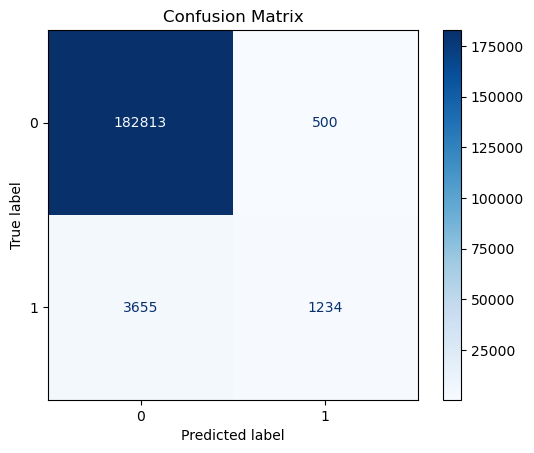

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


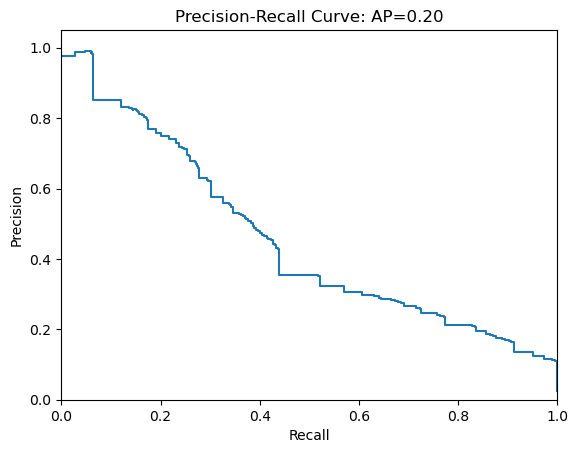

In [6]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve: AP={0:0.2f}'.format(average_precision_score(y_test, predictions)))

plt.show()


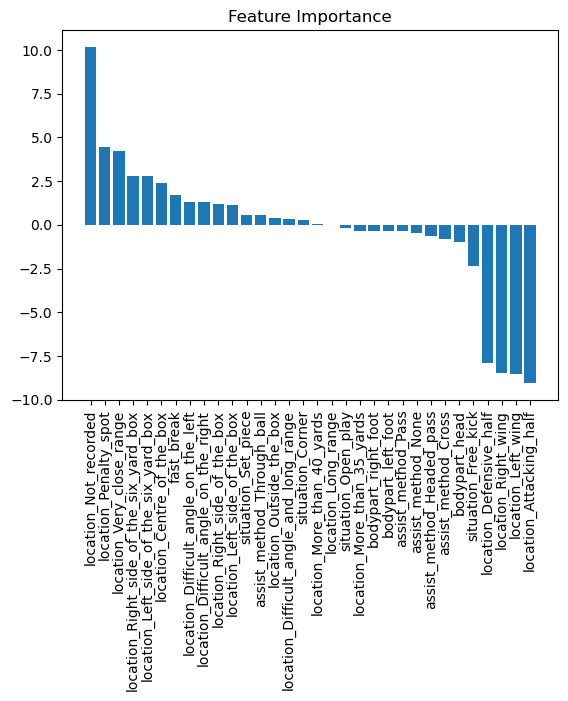

In [7]:
# For logistic regression, you can use the coefficients as an indication of feature importance
importance = model.coef_[0]
indices = np.argsort(importance)[::-1]

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importance[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()


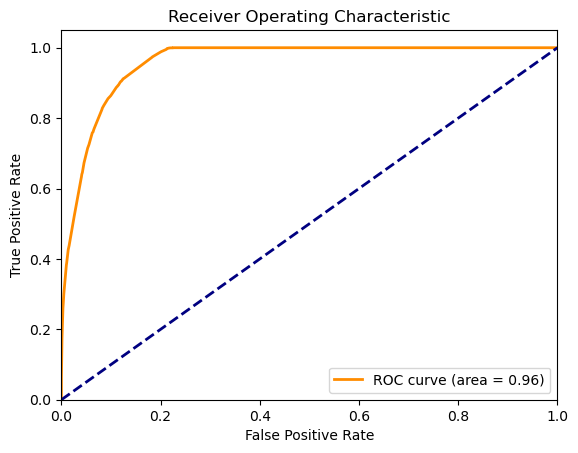

In [8]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
